# 1. Perkenalan

Nama : Gusti Ayu Dewi Puspa Kartikasari

Batch : FTDS-012

Dataset : rideshare_kaggle

Objective : Memprediksi harga perjalanan platform ride-hailing dari dataset diatas menggunakan Linear Regression

# 2. Import Libraries

> Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [8]:
#Kolom import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score

# 3. Data Loading

> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dl

In [9]:
#Data Loading from rideshare_kaggle
df = pd.read_csv(r'rideshare_kaggle.csv')
df.head(5)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [10]:
# copy df untuk menjaga data asli
df_copy = df.copy()

In [11]:
# melihat persebaran data df, dan mengetahui masing-masing kolom di dalam df
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,...,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,...,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


In [12]:
# melihat null vs non-null data df, untuk mengetahui missing value 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

Dari info diatas: price 637976 non-null dari 693071 data non-null, dapat dianalisa bahwa terdapat missing value pada kolom price (price).

# 4. Exploratory Data Analysis (EDA)

> Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

Text(0.5, 1.0, 'Histogram of Price')

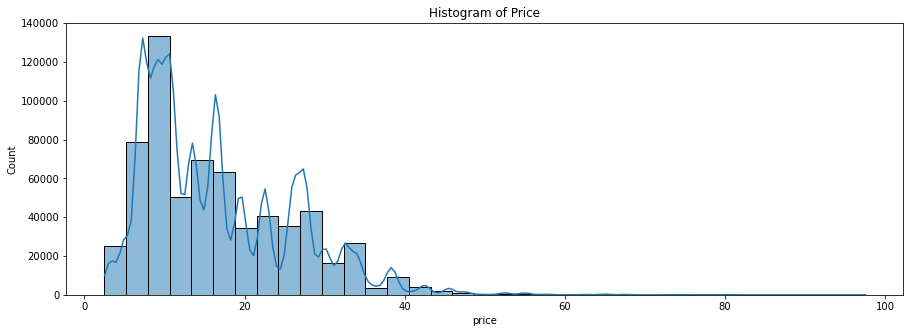

In [13]:
# Buat grafik price (target)
plt.figure(figsize=(15, 5))
sns.histplot(df_copy['price'], bins=35, kde=True)
plt.title('Histogram of Price')

Distribusi price berbentuk skew kekanan, banyak data yang berada pada range 0-20.

Text(0.5, 1.0, 'surge_multiplier vs price')

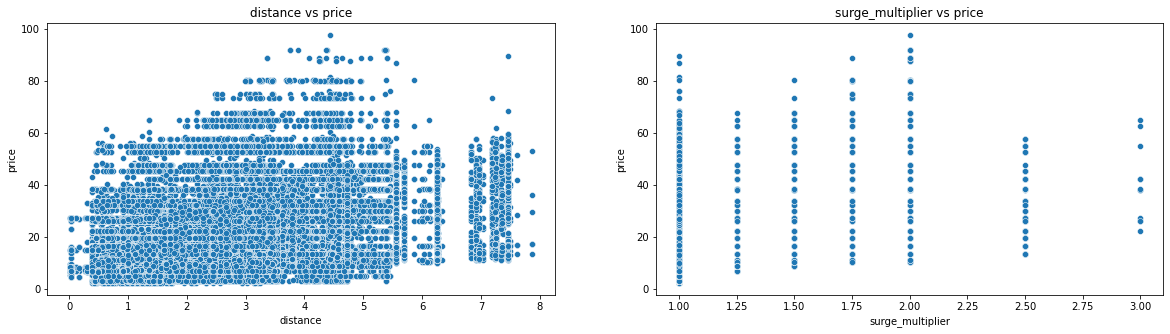

In [14]:
# membuat sactter plot dari distance, surge multiplier dan price 
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)

plt.subplot(1, 2, 1)
sns.scatterplot(x='distance', y='price', data=df_copy)
plt.title('distance vs price')

plt.subplot(1, 2, 2)
sns.scatterplot(x='surge_multiplier', y='price', data=df_copy)
plt.title('surge_multiplier vs price')

Dari scatter plot semakin besar distance semakin besar price, namun dapat dilihat bahwa terdapat beberapa data price yang tinggi walaupun distance masih moderate (range 4-6), menandakan bahwa terdapat faktor penentu lain yang membuat price menjadi tinggi.

surge multiplier juga bertanggung jawab untuk perubahan pada price terlihat dari bergesernya minimum price bagi tiap surge multiplier

In [15]:
# group by month dan price
df_copy.groupby(["month"])[["price"]].mean()

,price
month,
11,16.534981
12,16.552277


Group by month dan price dan hitung price rata-ratanya. Dapat dilihat bahwa rata-ratanya tidak berbeda jauh, maka bulan tidak terlalu berpengaruh terhadap price.

In [16]:
# group by day dan price
df_copy.groupby(["day"])[["price"]].mean()

,price
day,
1,16.572445
2,16.548695
3,16.464802
4,16.653522
9,16.795945
10,16.420284
13,16.589642
14,16.559872
15,16.560643


Group by day dan price dan hitung price rata-ratanya. Dapat dilihat bahwa rata-ratanya tidak berbeda jauh, maka tangal tidak terlalu berpengaruh terhadap price.

In [17]:
# group by hour dan price
df_copy.groupby(["hour"])[["price"]].mean()

,price
hour,
0,16.574769
1,16.513778
2,16.561803
3,16.539718
4,16.579311
5,16.537217
6,16.519326
7,16.491627
8,16.603326


Group by hour dan price dan hitung price rata-ratanya. Dapat dilihat bahwa rata-ratanya tidak berbeda jauh, maka jam tidak terlalu berpengaruh terhadap price.

In [18]:
# grup by cab_type sama dengan Lyft dimana nilai distance lebih besar dari 1 untuk melihat feature yang mungkin mempengaruhi
dflp = df_copy[(df_copy['cab_type'] == "Lyft") & (df_copy['distance'] == 1)]
dflp.iloc[:10,9:29]

,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh
1017,Lyft,lyft_line,Shared,3.0,1.0,1.0,42.3519,-71.0643,29.39,29.39,Clear,Mostly cloudy throughout the day.,0.0000,0.00,0.85,2.51,3.84,1543554000,9.950,42.61
1018,Lyft,lyft,Lyft,7.0,1.0,1.0,42.3398,-71.0892,41.82,36.10,Overcast,Light rain in the morning.,0.0000,0.00,0.73,9.51,15.95,1543338000,9.991,46.35
1019,Lyft,lyft_luxsuv,Lux Black XL,27.5,1.0,1.0,42.3661,-71.0631,30.04,27.07,Clear,Mostly cloudy throughout the day.,0.0000,0.00,0.85,3.02,3.02,1543554000,9.888,42.58
1020,Lyft,lyft_plus,Lyft XL,10.5,1.0,1.0,42.3559,-71.0550,20.42,15.44,Partly Cloudy,Partly cloudy throughout the day.,0.0000,0.00,0.64,3.48,3.48,1544738400,9.917,33.96
1021,Lyft,lyft_premier,Lux,13.5,1.0,1.0,42.2148,-71.0330,41.59,41.59,Overcast,"Rain until morning, starting again in the eve...",0.0000,0.00,0.93,1.85,2.03,1543291200,5.138,47.30
1022,Lyft,lyft_lux,Lux Black,16.5,1.0,1.0,42.3503,-71.0810,44.88,40.15,Light Rain,Light rain in the morning.,0.0786,1.00,0.93,8.86,15.23,1543338000,3.522,46.91
2952,Lyft,lyft_luxsuv,Lux Black XL,27.5,1.0,1.0,42.3519,-71.0551,36.87,31.64,Overcast,Light rain in the morning.,0.0005,0.07,0.87,6.56,8.60,1545022800,9.588,41.44
2953,Lyft,lyft_premier,Lux,10.5,1.0,1.0,42.3661,-71.0631,42.95,37.54,Mostly Cloudy,Light rain in the morning.,0.0000,0.00,0.72,9.42,13.80,1543338000,10.000,46.83
2954,Lyft,lyft_plus,Lyft XL,10.5,1.0,1.0,42.3647,-71.0542,32.31,28.18,Mostly Cloudy,Light rain in the morning and overnight.,0.0000,0.00,0.79,4.24,4.75,1543672800,9.850,44.66
2955,Lyft,lyft_line,Shared,3.0,1.0,1.0,42.3559,-71.0550,31.10,31.10,Overcast,Partly cloudy throughout the day.,0.0000,0.00,0.71,1.66,2.42,1544738400,9.849,33.96


Dari analisa ini didapatkan bahwa cab_type, name dan surge_multiplier juga mempengaruhi price

In [19]:
#groupby "cab_type","product_id","name","surge_multiplier" dengan nilai rata-rata price
df_copy.groupby(["cab_type","product_id","name","surge_multiplier"])[["price"]].mean()

price
cab_type product_id                           name         surge_multiplier           
Lyft     lyft                                 Lyft         1.00               9.281424
                                                           1.25              11.509698
                                                           1.50              13.731984
                                                           1.75              15.655992
                                                           2.00              17.331658
                                                           2.50              22.519481
                                                           3.00              29.750000
         lyft_line                            Shared       1.00               6.029893
         lyft_lux                             Lux Black    1.00              22.178923
                                                           1.25              28.099910
                                                           1.50              34.308490
                                                           1.75              40.017562
                                                           2.00              45.506237
         lyft_luxsuv                          Lux Black XL 1.00              31.103062
                                                           1.25              39.255074
                                                           1.50              47.631787
                                                           1.75              56.113636
                                                           2.00              63.613306
         lyft_plus                            Lyft XL      1.00              14.735208
                                                           1.25              18.482634
                                                           1.50              22.579467
                                                           1.75              26.101240
                                                           2.00              28.958543
                                                           2.50              37.896104
                                                           3.00              50.916667
         lyft_premier                         Lux          1.00              17.113552
                                                           1.25              21.495038
                                                           1.50              26.220632
                                                           1.75              30.480372
                                                           2.00              34.344075
Uber     55c66225-fbe7-4fd5-9072-eab1ece5e23e UberX        1.00               9.765074
         6c84fd89-3f11-4782-9b50-97c468b19529 Black        1.00              20.523786
         6d318bcc-22a3-4af6-bddd-b409bfce1546 Black SUV    1.00              30.286763
         6f72dfc5-27f1-42e8-84db-ccc7a75f6969 UberXL       1.00              15.678144
         8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a Taxi         1.00                    NaN
         997acbb5-e102-41e1-b155-9df7de0a73f2 UberPool     1.00               8.752500
         9a0e7b09-b92b-4c41-9779-2ad22b4d779d WAV          1.00               9.765019

terdapat beberapa point yang dapat diambil dari groupby ini
1. Semakin besar surge multiplier semakin besar price
2. Semakin tinggi kategori 'name' semakin besar price
3. Product_id mewakili masing-masing 'name' sehingga bisa hanya menggunakan kolom name
4. Nilai NaN dicurigai hanya terdapat pada kategori Taxi pada 'name' 

In [20]:
#Mencari kategori name dengan nilai price NaN
dfpriceisna = df_copy[df_copy['price'].isna()]
dfpriceisna['name'].unique()

array(['Taxi'], dtype=object)

Ternyata semua nilai NaN masuk ke dalam kategori Taxi pada kolom 'name'. Ini menandakan bahwa nilai nan bukan completely random, karena hanya dimilki oleh data uber-taxi.

In [21]:
#Mencari nilai Taxi yang tidak NaN
df_taxi = df_copy[df_copy['name'] == 'Taxi']
df_taxiisna = df_taxi[~df_taxi['price'].isna()]
df_taxiisna


,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime


In [22]:
#Mencari jumlah data Taxi
df_taxi.shape

(55095, 57)

Semua nilai price pada Taxi merupakan NaN. Maka diputuskan untuk drop row berkategori Taxi, walaupun nilai Taxi memiliki jumlah data sebanyak 55095 dari 693071 (7% dari keseluruhan data). Dengan catatan karena tanpa adanya satupun data di Taxi untuk dijadikan acuan maka predict yang dilakukan akan sangat sulit untuk mendekati angka yang sebenarnya.

Kemudian diputuskan juga untuk memberikan constraint pada model yang akan dibuat, yakni tidak untuk memprediksi harga Uber-Taxi.

# 5. Data Preprocessing

> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

## Deleting "Taxi" data at Name

In [23]:
#Menghapus kategori Taxi pada kolom name sesuai dengan finding diatas
df_copy_wotaxi = df_copy[df_copy['name'] != "Taxi"]
df_copy_wotaxi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           637976 non-null  object 
 1   timestamp                    637976 non-null  float64
 2   hour                         637976 non-null  int64  
 3   day                          637976 non-null  int64  
 4   month                        637976 non-null  int64  
 5   datetime                     637976 non-null  object 
 6   timezone                     637976 non-null  object 
 7   source                       637976 non-null  object 
 8   destination                  637976 non-null  object 
 9   cab_type                     637976 non-null  object 
 10  product_id                   637976 non-null  object 
 11  name                         637976 non-null  object 
 12  price                        637976 non-null  float64
 13 

Data taxi telah di drop, semua nilai NaN juga sekaligus ikut ke drop. 

## Get Data for Model Inference

In [24]:
#Get data inference sebanyak 30 row sample dan lock randomize.
df_inf = df_copy_wotaxi.sample(30, random_state = 15)
df_inf.shape

(30, 57)

In [25]:
# Hapus data yang dipakai oleh data inference dari df
df_trts = df_copy_wotaxi.drop(df_inf.index)

# Cek ukuran dataset untuk train dan test, telah berkurang 30 row dari 637976:
df_trts.shape

(637946, 57)

In [26]:
# Reset index dari kedua dataframe inference dan data untuk train & test
df_inf.reset_index(drop = True, inplace=True)
df_trts.reset_index(drop = True, inplace=True)
df_inf.iloc[:,:20]

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary
0,63c75c6b-41a4-4de5-a651-adece75f1d98,1.543806e+09,3,3,12,2018-12-03 03:08:00,America/New_York,Beacon Hill,North End,Lyft,lyft_luxsuv,Lux Black XL,27.5,2.10,1.00,42.2148,-71.0330,48.12,48.12,Overcast
1,9998bc4e-5f8f-4d4d-9559-6f98807a34ac,1.543281e+09,1,27,11,2018-11-27 01:06:23,America/New_York,North Station,Haymarket Square,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,7.0,0.56,1.00,42.2148,-71.0330,43.61,37.38,Rain
2,e47969c7-5af7-4339-bc05-24869cfc7ab8,1.544761e+09,4,14,12,2018-12-14 04:10:11,America/New_York,North Station,Haymarket Square,Uber,6c84fd89-3f11-4782-9b50-97c468b19529,Black,15.0,0.56,1.00,42.3559,-71.0550,31.10,31.10,Overcast
3,5268073c-0c94-4ca4-8253-6f59e6a991ed,1.543415e+09,14,28,11,2018-11-28 14:21:26,America/New_York,Back Bay,South Station,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,9.5,3.45,1.00,42.3661,-71.0631,39.02,34.01,Partly Cloudy
4,18f63fd3-9566-403b-9883-d581dec3d352,1.545065e+09,16,17,12,2018-12-17 16:40:08,America/New_York,West End,South Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,1.73,1.00,42.3505,-71.1054,37.62,32.77,Overcast
5,9255eb13-530d-4865-b050-de52432a3a40,1.545155e+09,17,18,12,2018-12-18 17:35:03,America/New_York,Theatre District,Northeastern University,Lyft,lyft_lux,Lux Black,22.5,2.12,1.00,42.3429,-71.1003,30.78,20.93,Clear
6,28b4fc56-4b81-4396-9df4-55d3583e35df,1.543647e+09,6,1,12,2018-12-01 06:47:59,America/New_York,Boston University,Financial District,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,14.0,4.72,1.00,42.3647,-71.0542,34.59,32.16,Overcast
7,7e2843e8-819a-40d2-b03a-db636e59f658,1.543706e+09,23,1,12,2018-12-01 23:18:00,America/New_York,Beacon Hill,Northeastern University,Lyft,lyft_luxsuv,Lux Black XL,32.5,2.47,1.00,42.3519,-71.0643,37.05,37.05,Partly Cloudy
8,c5760c23-f67d-41ca-99ab-061b4d8c40dd,1.544739e+09,22,13,12,2018-12-13 22:05:05,America/New_York,North Station,South Station,Lyft,lyft_line,Shared,5.0,2.08,1.00,42.3644,-71.0661,31.98,31.98,Mostly Cloudy
9,c1b639e5-72a3-4a6e-a0a1-9876ab89f31c,1.544985e+09,18,16,12,2018-12-16 18:25:07,America/New_York,Financial District,South Station,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,26.0,0.39,1.00,42.3588,-71.0707,42.82,38.16,Overcast


## Splitting Dataset

In [27]:
#Splitting dataset X adalah feature dan y adalah target
X = df_trts.drop('price', axis = 1)
y = df_trts['price']

In [28]:
#Splitting dataset menjadi 80% untuk train dan 20% untuk test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [29]:
#Cek ukuran dataset train dan test untuk memastikan proporsi
print('Train set size: ', X_train.shape)
print('Test set size: ', X_test.shape)

Train set size:  (510356, 56)
Test set size:  (127590, 56)


## Feature Selection

Feature Selection dilakukan sebelum data preprocessing untuk mempersempit cakupan preprocessing data sehingga dapat mengurangi waktu pengolahan data dan menghindari mengolah data yang pada akhirnya tidak terpakai.

In [30]:
#Display X_train to see the features
X_train.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
591914,2cf9448b-1a08-4639-9930-3b10956bc87a,1.543729e+09,5,2,12,2018-12-02 05:33:02,America/New_York,Beacon Hill,Fenway,Uber,...,0.0916,1543770000,36.32,1543726800,50.80,1543788000,35.84,1543748400,50.13,1543788000
517053,08769196-6ce3-4db9-a849-28dbe6657b21,1.543511e+09,17,29,11,2018-11-29 17:03:02,America/New_York,South Station,Beacon Hill,Uber,...,0.0000,1543510800,34.83,1543550400,45.03,1543510800,30.90,1543550400,38.93,1543510800
108276,3ee1608d-89f3-4044-882b-0daedf21c9dd,1.543302e+09,6,27,11,2018-11-27 06:54:23,America/New_York,Financial District,South Station,Uber,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
123891,c188b8f8-ec17-43cf-ae2e-a8a1af5742cf,1.544987e+09,18,16,12,2018-12-16 18:55:08,America/New_York,North End,Beacon Hill,Uber,...,0.1250,1544979600,39.01,1544954400,43.68,1544990400,34.03,1545019200,38.28,1544986800
509219,8c6ed652-6a3b-481a-b903-c76e66cddaec,1.543748e+09,10,2,12,2018-12-02 10:53:03,America/New_York,Boston University,North Station,Lyft,...,0.0888,1543770000,36.60,1543726800,50.99,1543788000,35.85,1543748400,50.32,1543788000


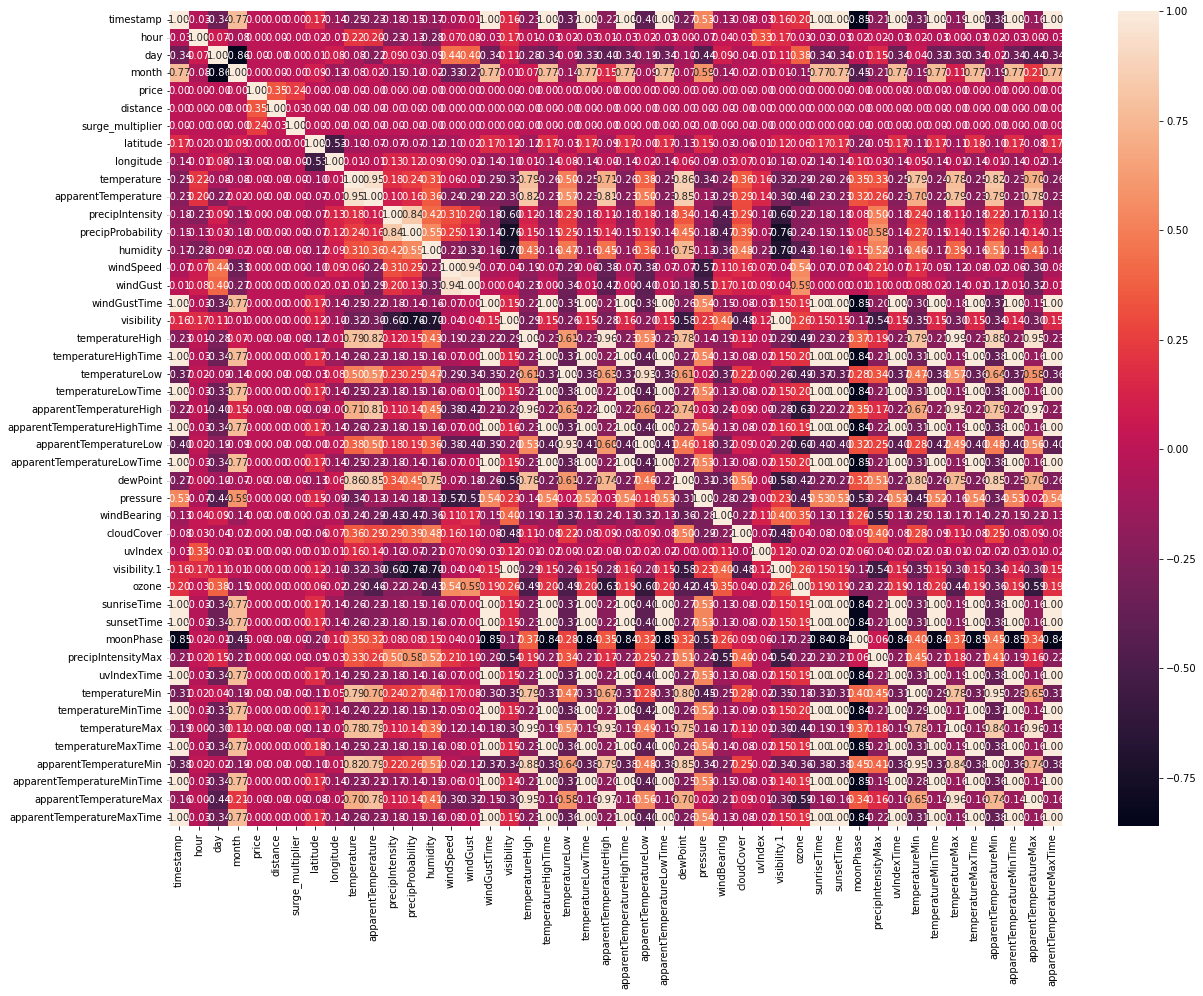

In [31]:
# Use heatmap for identifying correlation between numeric features
plt.figure(figsize=(20,15))
sns.heatmap(df_trts.corr(), annot=True, fmt='.2f')
plt.show()

Dari heatmap ini dapat terlihat bahwa yang mempunyai korelasi terhadap price adalah distance dan surge multiplier. Karena itu kedua kolom ini akan digunakan sebagai feature.

In [32]:
# menganalisa feature lain yang dicurigai memiliki korelasi dengan price dengan menentukan nilai beberapa feature yang terpilih dan melihat perbedaannya 
df_analyze = df_copy_wotaxi.loc[:,['price','cab_type','name', 'distance','surge_multiplier','short_summary','temperature','visibility']]
df_analyze = df_analyze[
    (df_analyze['cab_type'] == 'Lyft') &
    (df_analyze['name'] == 'Lux') &
    (df_analyze['distance'] == 1) &
    (df_analyze['surge_multiplier'] == 1)
]
df_analyze.iloc[20:35].sort_values(by='price', ascending=False) 

,price,cab_type,name,distance,surge_multiplier,short_summary,temperature,visibility
55512,13.5,Lyft,Lux,1.0,1.0,Rain,43.73,4.503
57964,13.5,Lyft,Lux,1.0,1.0,Partly Cloudy,53.51,9.503
59253,13.5,Lyft,Lux,1.0,1.0,Overcast,29.36,9.375
60240,13.5,Lyft,Lux,1.0,1.0,Overcast,31.41,10.000
60463,13.5,Lyft,Lux,1.0,1.0,Overcast,49.50,6.105
62658,13.5,Lyft,Lux,1.0,1.0,Light Rain,46.30,3.295
68595,13.5,Lyft,Lux,1.0,1.0,Overcast,31.71,7.113
79806,13.5,Lyft,Lux,1.0,1.0,Clear,18.91,10.000
85812,13.5,Lyft,Lux,1.0,1.0,Mostly Cloudy,52.90,10.000
89794,13.5,Lyft,Lux,1.0,1.0,Overcast,39.75,9.775


Hasil dari analisa ini, terdapat beberapa feature tambahan yang dipuruskan untuk dimasukkan kedalam model yakni short summary, temperature dan visibility

In [33]:
#Keep only featurs that selected
#Features selected: cab_type, name, distance, surge_multiplier, temperature,short_summary,visibility

X_train_fs = X_train.loc[:,['cab_type','name', 'distance','surge_multiplier','temperature','short_summary','visibility']]
X_test_fs = X_test.loc[:,['cab_type','name', 'distance','surge_multiplier','temperature','short_summary','visibility']]
X_test_fs

,cab_type,name,distance,surge_multiplier,temperature,short_summary,visibility
571904,Lyft,Lyft XL,1.49,1.00,45.32,Overcast,10.000
229676,Uber,UberXL,3.01,1.00,35.19,Overcast,8.459
529701,Lyft,Lux,3.20,1.00,38.19,Overcast,9.698
263087,Lyft,Lux Black XL,3.97,1.00,40.47,Mostly Cloudy,9.770
542026,Lyft,Shared,2.15,1.00,44.93,Possible Drizzle,9.967
...,...,...,...,...,...,...,...
79249,Lyft,Lux,2.41,1.25,41.34,Overcast,9.830
293755,Lyft,Lux Black XL,0.45,1.00,38.62,Overcast,10.000
105400,Lyft,Lyft,1.44,1.00,40.40,Mostly Cloudy,9.808
362554,Uber,UberPool,0.55,1.00,45.16,Mostly Cloudy,10.000


## Missing value handling

In [34]:
# Looking missing value in X_train
X_train_fs.isnull().sum().sum()

0

In [35]:
# Looking missing value in X_test
X_test_fs.isnull().sum().sum()

0

In [36]:
# Looking missing value in y_train
y_train.isnull().sum().sum()

0

In [37]:
# Looking missing value in y_test
y_test.isnull().sum().sum()

0

Tidak terdapat missing value pada kedua dataset karena Taxi(semua NaN data berada pada kategori name ini) telah di drop. Proceed ke outlier handling.

## Split between Numerical Columns and Categorical Columns

Data Splitting antara kolom kategori dan numerical dilakukan sebelum outlier untuk memudahkan outlier handling, baik dari sisi grafik dan pengihitungan outlier.

In [38]:
#Memilih feature numerical dan categorical
#Note: Surge_multiplier dimasukkan dalam categorical karena menggambarkan sebuah kategori demand

num_col = ['distance', 'temperature','visibility']
cat_col = ['cab_type', 'name','short_summary','surge_multiplier']

In [39]:
# Split data set sesuai dengan categorical dan numerical
X_train_num = X_train[num_col]
X_train_cat = X_train[cat_col]

X_test_num = X_test[num_col]
X_test_cat = X_test[cat_col]

## Outliers handling

In [40]:
# Membuat def fungsi untuk membuat histogram dan boxplot bagi numerical X_train 
def hist_boxplot(df, variable):
    # Define figure size
    plt.figure(figsize=(10, 3))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

    print('skewness:', df[variable].skew())
    if (df[variable].skew() >= -0.5 ) | (df[variable].skew() <= 0.5 ) :
      print('the distribution is skewed')
    else:
      print('the distribution is normal')

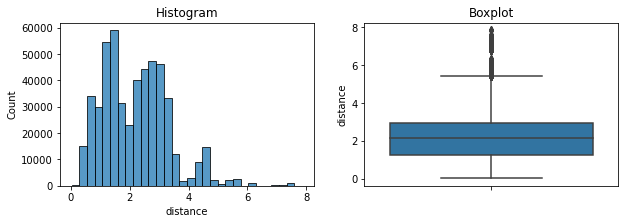

skewness: 0.8145166606416431
the distribution is skewed


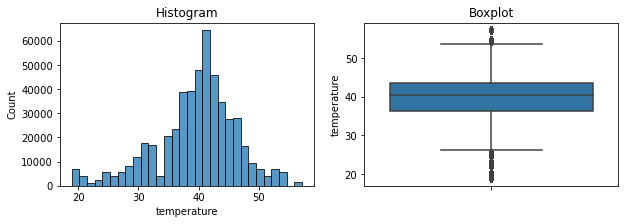

skewness: -0.6087373314314053
the distribution is skewed


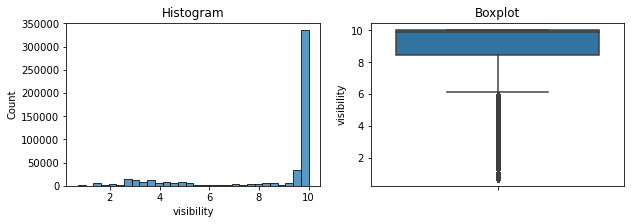

skewness: -1.5064406397701413
the distribution is skewed


In [41]:
#munculkan histogram dan boxplot bagi ketiga feature di X_Traim_num
hist_boxplot(X_train_num, 'distance')
hist_boxplot(X_train_num, 'temperature')
hist_boxplot(X_train_num, 'visibility')

Ketiga features memiliki skewed distribution, sehingga metode yang digunakna untuk handling outlier adalah Tukey (IQR)

In [42]:
# Membuat fungsi tukey untuk menghitung upper limit dan lower limit bagi ketiga feature
def skewed_limit(df, variable):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_limit = df[variable].quantile(0.25) - (IQR * 1.5)
    upper_limit = df[variable].quantile(0.75) + (IQR * 1.5)

    return upper_limit, lower_limit

In [43]:
# Fungsi untuk memfilter outlier (mencari outlier)
def find_outliers(df,variable,upper,lower):
  return df[
            (df[variable] > upper) |
            (df[variable] < lower)
            ]

In [44]:
# Fungsi untuk memfilter data non-outlier/ membersihkan outlier
def filter_outliers(df,variable,upper,lower):
  return df[
            (df[variable] <= upper) &
            (df[variable] >= lower)
            ]

In [45]:
# Mencari UL dan LL bagi ketiga feature
distance_UL,distance_LL = skewed_limit(X_train_num,'distance')
temperature_UL,temperature_LL = skewed_limit(X_train_num,'temperature')
visibility_UL,visibility_LL = skewed_limit(X_train_num,'visibility')

print('distance LL and UL = ', distance_UL,' and ', distance_LL)
print('temperature LL and UL = ', temperature_UL,' and ', temperature_LL)
print('visibility LL and UL = ', visibility_UL,' and ', visibility_LL)

distance LL and UL =  5.42  and  -1.2200000000000002
temperature LL and UL =  54.27499999999999  and  25.75500000000001
visibility LL and UL =  12.342  and  6.086


In [46]:
#mencari outliers distance, menyimpannya ke dalam variable agar indexnya dapat digunakan untuk drop index pada category dan y(target)
distance_train_outliers = find_outliers(X_train_num,'distance',distance_UL,distance_LL)
distance_train_outliers

,distance,temperature,visibility
101619,6.26,44.89,9.962
33770,5.56,40.47,9.770
203313,6.26,36.95,9.889
155432,5.56,29.63,9.716
341625,7.46,40.39,3.202
...,...,...,...
378424,6.26,27.77,9.608
300961,5.56,40.43,10.000
334385,5.56,37.83,3.139
337884,5.56,42.85,9.984


In [47]:
# Mencari outliers temperature
find_outliers(X_train_num,'temperature',temperature_UL,temperature_LL)

,distance,temperature,visibility
425605,2.61,54.59,10.000
405962,1.07,20.01,9.968
342459,2.78,54.38,9.936
369905,1.35,22.18,9.428
212878,1.48,54.38,9.936
...,...,...,...
253284,1.23,57.22,10.000
105812,2.48,25.55,9.568
491282,1.64,20.01,9.968
51518,1.35,20.38,9.831


In [48]:
#Mencari outliers visibility
find_outliers(X_train_num,'visibility',visibility_UL,visibility_LL)

,distance,temperature,visibility
108276,0.39,43.03,2.642
509219,3.52,38.92,4.183
216906,1.62,43.51,2.644
277992,2.48,41.19,4.661
401448,0.62,41.40,0.965
...,...,...,...
435357,2.42,47.93,4.315
299820,1.23,48.23,1.588
45999,1.00,43.73,4.503
554699,1.61,40.08,2.585


In [49]:
#mencari outliers distance test berdasarkan train, menyimpannya ke dalam variable agar indexnya dapat digunakan untuk drop index pada category dan y(target)
distance_test_outliers = find_outliers(X_test_num,'distance',distance_UL,distance_LL)
distance_test_outliers

,distance,temperature,visibility
442813,5.56,34.38,10.000
170107,6.26,46.15,10.000
378139,5.56,36.45,9.037
24336,5.56,43.29,2.683
536144,5.70,35.98,9.843
...,...,...,...
79713,5.43,41.34,9.830
206896,7.46,29.09,9.931
204801,6.26,38.54,4.421
254916,7.46,39.41,9.996


In [50]:
# For distance because outliers is only 5335 out of 510356 (only 1%) it is decided to trim the data
distance_train_outliers_index = distance_train_outliers.index
X_train_num_woutliers = X_train_num.copy()
X_train_num_woutliers.drop(index = distance_train_outliers_index, inplace = True)


distance_test_outliers_index = distance_test_outliers.index
X_test_num_woutliers = X_test_num.copy()
X_test_num_woutliers.drop(index=distance_test_outliers_index, inplace = True)

In [51]:
#checking of all of outliers in distance already dropped
find_outliers(X_test_num_woutliers,'distance',distance_UL,distance_LL)

,distance,temperature,visibility


In [52]:
# Droping column row in category train dataset
X_train_cat_woutliers = X_train_cat.copy()
X_train_cat_woutliers.drop(index = distance_train_outliers_index, inplace = True)

X_test_cat_woutliers = X_test_cat.copy()
X_test_cat_woutliers.drop(index=distance_test_outliers_index, inplace = True)

In [53]:
# Droping column y train and test dataset
y_train_drop = y_train.copy()
y_train_drop.drop(index = distance_train_outliers_index, inplace = True)


y_test_drop = y_test.copy()
y_test_drop.drop(index = distance_test_outliers_index, inplace = True)


In [54]:
# For temperature because outliers is 27117 out of 510356 (5.3%) dan visibility 127590 out of 510356 (25%) the method used is capping

windsorisertemp = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # both tails because temperature is both tail skewed
                          fold=1.5,
                          variables=['temperature'])

windsoriservis = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='left', # left because temperature is left tail skewed
                          fold=1.5,
                          variables=['visibility'])

windsorisertemp.fit(X_train_num_woutliers) #lakukan fit model winsorizer temperature
windsoriservis.fit(X_train_num_woutliers) #lakukan fit model winsorizer visibility

X_train_num_woutliers2 = windsorisertemp.transform(X_train_num_woutliers) #lakukan transform model winsorizer temperature
X_train_num_woutliers2 = windsoriservis.transform(X_train_num_woutliers2) #lakukan transform model winsorizer visibility

In [55]:
#Showing before and after capping
print(X_train_num_woutliers.describe())
print('----------VS-----------')
print(X_train_num_woutliers2.describe())

            distance    temperature     visibility
count  505021.000000  505021.000000  505021.000000
mean        2.145867      39.580496       8.468125
std         1.058213       6.732093       2.603089
min         0.020000      18.910000       0.717000
25%         1.260000      36.450000       8.432000
50%         2.140000      40.490000       9.880000
75%         2.880000      43.580000       9.996000
max         5.420000      57.220000      10.000000
----------VS-----------
            distance    temperature     visibility
count  505021.000000  505021.000000  505021.000000
mean        2.145867      39.730557       8.986633
std         1.058213       6.300189       1.557542
min         0.020000      25.755000       6.086000
25%         1.260000      36.450000       8.432000
50%         2.140000      40.490000       9.880000
75%         2.880000      43.580000       9.996000
max         5.420000      54.275000      10.000000


terdapat perbedaan data min, max dan mean dari temperature | 
terdapat perbedaan data min dan mean dari visibilty | 
dikarenakan handling outliers


In [56]:
#Lakukan transform pada test juga berdasarkan fit model train
X_test_num_woutliers2 = windsorisertemp.transform(X_test_num_woutliers)
X_test_num_woutliers2 = windsoriservis.transform(X_test_num_woutliers2)

In [57]:
#Showing before and after capping
print(X_test_num_woutliers.describe())
print('----------VS-----------')
print(X_test_num_woutliers2.describe())

            distance    temperature     visibility
count  126253.000000  126253.000000  126253.000000
mean        2.147545      39.592101       8.474382
std         1.056059       6.700027       2.597060
min         0.020000      18.910000       0.717000
25%         1.270000      36.500000       8.432000
50%         2.140000      40.490000       9.880000
75%         2.880000      43.580000       9.996000
max         5.420000      57.220000      10.000000
----------VS-----------
            distance    temperature     visibility
count  126253.000000  126253.000000  126253.000000
mean        2.147545      39.740326       8.989637
std         1.056059       6.276570       1.554585
min         0.020000      25.755000       6.086000
25%         1.270000      36.500000       8.432000
50%         2.140000      40.490000       9.880000
75%         2.880000      43.580000       9.996000
max         5.420000      54.275000      10.000000


terdapat perbedaan data min, max dan mean dari temperature | 
terdapat perbedaan data min dan mean dari visibilty
dikarenakan handling outliers berdasarkan hasil fit model train

## Cardinality

Lakukan cardinality apabila diperlukan pada category dataset

In [58]:
#Show train category dataset
X_train_cat_woutliers


,cab_type,name,short_summary,surge_multiplier
591914,Uber,Black,Overcast,1.0
517053,Uber,UberX,Partly Cloudy,1.0
108276,Uber,UberX,Light Rain,1.0
123891,Uber,Black SUV,Overcast,1.0
509219,Lyft,Lyft XL,Light Rain,1.0
...,...,...,...,...
44231,Lyft,Lyft XL,Clear,1.0
35483,Lyft,Lyft XL,Overcast,1.0
629120,Lyft,Shared,Light Rain,1.0
199301,Uber,Black SUV,Overcast,1.0


In [59]:
#Check semua unique value pada df_copy tanpa taxi
print("cab_type:", len(df_copy_wotaxi['cab_type'].unique()))
print("name:", len(df_copy_wotaxi['name'].unique()))
print("short_summary:", len(df_copy_wotaxi['short_summary'].unique()))
print("surge_multiplier:", len(df_copy_wotaxi['surge_multiplier'].unique()))

cab_type: 2
name: 12
short_summary: 9
surge_multiplier: 7


In [60]:
#Check semua unique value pada X train category tanpa outliers
print("cab_type:", len(X_train_cat_woutliers['cab_type'].unique()))
print("name:", len(X_train_cat_woutliers['name'].unique()))
print("short_summary:", len(X_train_cat_woutliers['short_summary'].unique()))
print("surge_multiplier:", len(X_train_cat_woutliers['surge_multiplier'].unique()))

cab_type: 2
name: 12
short_summary: 9
surge_multiplier: 7


In [61]:
#Check semua unique value pada X test category tanpa outliers
print("cab_type:", len(X_test_cat_woutliers['cab_type'].unique()))
print("name:", len(X_test_cat_woutliers['name'].unique()))
print("short_summary:", len(X_test_cat_woutliers['short_summary'].unique()))
print("surge_multiplier:", len(X_test_cat_woutliers['surge_multiplier'].unique()))

cab_type: 2
name: 12
short_summary: 9
surge_multiplier: 7


Test dan train memiliki semua category yang terdapat pada df_copy dan masing-masing category memiliki jumlah yang sedikit sehingga cardinality tidak diperlukan

## Feature Scaling

Dikarenakan ketiga feature pada numeric dataset merupakan skewed maka scaling dilakukan dengan menggunakan minmax scaler

In [62]:
#Feature scaling dengan menggunakan minmax scaler
scaler = MinMaxScaler()
scaler.fit(X_train_num_woutliers2)

X_train_num_sc = scaler.transform(X_train_num_woutliers2) #scaling train
X_test_num_sc = scaler.transform(X_test_num_woutliers2) #scaling test
X_train_num_sc

array([[0.42592593, 0.43600982, 0.92284108],
       [0.45925926, 0.63657083, 0.99310169],
       [0.06851852, 0.60571529, 0.        ],
       ...,
       [0.64814815, 0.65164797, 0.        ],
       [0.42777778, 0.52962833, 0.97138477],
       [0.77592593, 0.54014727, 1.        ]])

Scaling telah dilakukan

## Feature Encoding

In [63]:
# Show category dataset
X_train_cat_woutliers.head(3)

,cab_type,name,short_summary,surge_multiplier
591914,Uber,Black,Overcast,1.0
517053,Uber,UberX,Partly Cloudy,1.0
108276,Uber,UberX,Light Rain,1.0


In [64]:
#Split data train menjadi nominal, ordinal dan none (tidak dilakukan encoding karena telah encoded) category
X_train_cat_nom = X_train_cat_woutliers['cab_type']
X_train_cat_ordinal = X_train_cat_woutliers[['name','short_summary']]
X_train_cat_none = X_train_cat_woutliers[['surge_multiplier']]

#Split data test menjadi nominal, ordinal dan none (tidak dilakukan encoding karena telah encoded) category
X_test_cat_nom = X_test_cat_woutliers['cab_type']
X_test_cat_ordinal = X_test_cat_woutliers[['name','short_summary']]
X_test_cat_none = X_test_cat_woutliers[['surge_multiplier']]

In [65]:
#fit one hot encoder bagi nominal category
encoder = OneHotEncoder()
encoder.fit(pd.DataFrame(X_train_cat_nom))

OneHotEncoder()

In [66]:
#transform dataset nominal train dan test menggunakan onehot encoder
X_train_cat_nom_enc = encoder.transform(pd.DataFrame(X_train_cat_nom)).toarray()
X_test_cat_nom_enc = encoder.transform(pd.DataFrame(X_test_cat_nom)).toarray()

In [67]:
X_train_cat_nom_enc

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [68]:
#mencari susunan ordinal bagi name
df_copy_wotaxi[df_copy_wotaxi["surge_multiplier"]==1].groupby(["cab_type","name","surge_multiplier"])[["price"]].mean().sort_values(by='price', ascending=True) 

price
cab_type name         surge_multiplier           
Lyft     Shared       1.0                6.029893
Uber     UberPool     1.0                8.752500
Lyft     Lyft         1.0                9.281424
Uber     WAV          1.0                9.765019
         UberX        1.0                9.765074
Lyft     Lyft XL      1.0               14.735208
Uber     UberXL       1.0               15.678144
Lyft     Lux          1.0               17.113552
Uber     Black        1.0               20.523786
Lyft     Lux Black    1.0               22.178923
Uber     Black SUV    1.0               30.286763
Lyft     Lux Black XL 1.0               31.103062

In [69]:
#Melakukan encoding bagi category ordinal sesuai dengan urutan yang telah ditentukan
encoder2 = OrdinalEncoder(categories=[['Shared', 'UberPool', 'Lyft','WAV','UberX','Lyft XL','UberXL','Lux','Black','Lux Black','Black SUV','Lux Black XL'],
                                     [' Clear ', ' Partly Cloudy ', ' Mostly Cloudy ', ' Overcast ',' Foggy ',' Possible Drizzle ',' Drizzle ',' Light Rain ',' Rain ']])
encoder2.fit(pd.DataFrame(X_train_cat_ordinal)) #lakukan fit berdasarkan train

X_train_cat_ordinal_enc = encoder2.transform(pd.DataFrame(X_train_cat_ordinal)) #lakukan transform train berdasarkan fit
X_test_cat_ordinal_enc = encoder2.transform(pd.DataFrame(X_test_cat_ordinal)) #lakukan transform test berdasarkan fit
X_train_cat_ordinal_enc

array([[ 8.,  3.],
       [ 4.,  1.],
       [ 4.,  7.],
       ...,
       [ 0.,  7.],
       [10.,  3.],
       [ 0.,  2.]])

Encoding telah berhasil dilakukan

## Concate between Numerical Columns and Categorical Columns

In [70]:
#Satukan keempat dataset train dan test yang telah melewati proses scaling dan encoding (X_train_num_sc, X_train_cat_nom_enc, X_train_cat_ordinal_enc,X_train_cat_none)
X_train_fin = np.concatenate([X_train_num_sc, X_train_cat_nom_enc, X_train_cat_ordinal_enc,X_train_cat_none], axis=1)
X_test_fin = np.concatenate([X_test_num_sc, X_test_cat_nom_enc, X_test_cat_ordinal_enc,X_test_cat_none], axis=1)
X_train_fin

array([[ 0.42592593,  0.43600982,  0.92284108, ...,  8.        ,
         3.        ,  1.        ],
       [ 0.45925926,  0.63657083,  0.99310169, ...,  4.        ,
         1.        ,  1.        ],
       [ 0.06851852,  0.60571529,  0.        , ...,  4.        ,
         7.        ,  1.        ],
       ...,
       [ 0.64814815,  0.65164797,  0.        , ...,  0.        ,
         7.        ,  1.        ],
       [ 0.42777778,  0.52962833,  0.97138477, ..., 10.        ,
         3.        ,  1.        ],
       [ 0.77592593,  0.54014727,  1.        , ...,  0.        ,
         2.        ,  1.        ]])

# 6. Model definition

Notes :

Algoritma yang akan dipakai adalah Linear Regression.

Dengan metrics yang akan dipakai untuk mengevaluasi adalah Mean Absolute Error (MAE) untuk mengetahui range eror dati prediksi dan R2 untuk mengetahui % kesesuaian model yang diajukan kepada kondisi aktual

In [71]:
# Training using Linear Regression
model_linreg = LinearRegression()

# 7. Model Training

In [72]:
# Train model menggunakan dataset X dan y train

model_linreg.fit(X_train_fin, y_train_drop)

LinearRegression()

# 8. Model Evaluation

In [73]:
#Lakukan predict bagi test dan train
y_pred_train = model_linreg.predict(X_train_fin)
y_pred_test = model_linreg.predict(X_test_fin)

In [74]:
#hitung MAE dan R2 dari hasil prediksi train dan test terhadap y 
print('MAE - Train Set : ', mean_absolute_error(y_train_drop, y_pred_train))
print('MAE - Test Set  : ', mean_absolute_error(y_test_drop, y_pred_test))
print('r2score - Train Set = ', r2_score(y_train_drop, y_pred_train))
print('r2score - Test Set = ', r2_score(y_test_drop, y_pred_test))

MAE - Train Set :  2.6140726460304786
MAE - Test Set  :  2.6162967078140413
r2score - Train Set =  0.8706305925921878
r2score - Test Set =  0.8694758899944796


Nilai MAE train set dan test set menggambarkan seberapa besar eror rata-rata per prediksinya yakni +- 2.61. Kedua train dan test bernilai hampir sama dan memiliki angka yang relatif kecil sehingga dapat ditentukan sebagai Good fit

Nilai R2 mencerminkan % kesesuaian model yang dibuat dengan keadaan aktual. Model yang di memiliki kemiripan 87% dengan kondisi aktual, perbedaan antara train dan test juga kecil. Sama dengan hasil MAE, model ini ditentukan sebagai Good fit.

In [75]:
#print koefisien
model_linreg.coef_

array([ 1.54454044e+01,  2.92854193e-02, -7.78141806e-03,  1.17481616e-01,
       -1.17481616e-01,  2.25151042e+00, -2.93935107e-03,  1.75893644e+01])

In [76]:
#print intercept
model_linreg.intercept_

-19.863461522280524

# 9. Model Inference

Lakukan test terhadap data inference (data yang akan ada di masa depan)

In [77]:
#munculkan data set inference
df_inf.head(5)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,63c75c6b-41a4-4de5-a651-adece75f1d98,1.543806e+09,3,3,12,2018-12-03 03:08:00,America/New_York,Beacon Hill,North End,Lyft,...,0.1055,1543770000,36.35,1543726800,52.86,1543788000,35.33,1543744800,52.19,1543788000
1,9998bc4e-5f8f-4d4d-9559-6f98807a34ac,1.543281e+09,1,27,11,2018-11-27 01:06:23,America/New_York,North Station,Haymarket Square,Uber,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,e47969c7-5af7-4339-bc05-24869cfc7ab8,1.544761e+09,4,14,12,2018-12-14 04:10:11,America/New_York,North Station,Haymarket Square,Uber,...,0.0001,1544716800,18.24,1544688000,33.96,1544731200,13.72,1544688000,32.95,1544734800
3,5268073c-0c94-4ca4-8253-6f59e6a991ed,1.543415e+09,14,28,11,2018-11-28 14:21:26,America/New_York,Back Bay,South Station,Uber,...,0.0000,1543420800,33.75,1543399200,42.60,1543438800,29.97,1543399200,36.58,1543438800
4,18f63fd3-9566-403b-9883-d581dec3d352,1.545065e+09,16,17,12,2018-12-17 16:40:08,America/New_York,West End,South Station,Lyft,...,0.0217,1545066000,34.22,1545044400,41.44,1545076800,28.61,1545044400,36.09,1545076800


In [78]:
#Lihat missing value pada data inference
df_inf.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

Tidak ada missing value pada data inference

In [79]:
#Split data inference berdasarkan kolom numeric dan categoric
data_inf_num = df_inf[num_col]
data_inf_cat = df_inf[cat_col]

In [80]:
#Handling outliers: tidak ada data distance yang merupakan outliers
distance_inf_outliers = find_outliers(data_inf_num,'distance',distance_UL,distance_LL)
distance_inf_outliers

,distance,temperature,visibility


In [81]:
#Scaling dataset numeric ineference
X_inf_num_sc = scaler.transform(data_inf_num)

In [82]:
#Split categorical inference to nominal, ordinal dan none
X_inf_cat_nom = data_inf_cat['cab_type']
X_inf_cat_ordinal = data_inf_cat[['name','short_summary']]
X_inf_cat_none = data_inf_cat[['surge_multiplier']]


In [83]:
#Encoding dataset categorical inference (nominal)
X_inf_cat_nom_enc = encoder.transform(pd.DataFrame(X_inf_cat_nom)).toarray()

In [84]:
#Encoding dataset categorical inference (ordinal)
X_inf_cat_ordinal_enc = encoder2.transform(pd.DataFrame(X_inf_cat_ordinal))

In [85]:
#satukan keempat scaled dan encoded data inference (X_inf_num_sc, X_inf_cat_nom_enc, X_inf_cat_ordinal_enc,X_inf_cat_none)
X_inf_fin = np.concatenate([X_inf_num_sc, X_inf_cat_nom_enc, X_inf_cat_ordinal_enc,X_inf_cat_none], axis=1)
X_inf_fin

array([[ 0.38518519,  0.78418654, -0.34644865,  1.        ,  0.        ,
        11.        ,  3.        ,  1.        ],
       [ 0.1       ,  0.62605189, -0.21742463,  0.        ,  1.        ,
         4.        ,  8.        ,  1.        ],
       [ 0.1       ,  0.18741234,  0.96142054,  0.        ,  1.        ,
         8.        ,  3.        ,  1.        ],
       [ 0.63518519,  0.4651122 ,  0.97649463,  0.        ,  1.        ,
         3.        ,  1.        ,  1.        ],
       [ 0.31666667,  0.41602384,  0.62698007,  1.        ,  0.        ,
        11.        ,  3.        ,  1.        ],
       [ 0.38888889,  0.17619215,  1.        ,  1.        ,  0.        ,
         9.        ,  0.        ,  1.        ],
       [ 0.87037037,  0.30978261,  0.98594788,  0.        ,  1.        ,
         4.        ,  3.        ,  1.        ],
       [ 0.4537037 ,  0.39603787,  0.94506898,  1.        ,  0.        ,
        11.        ,  1.        ,  1.        ],
       [ 0.38148148,  0.21826788

In [86]:
# Predict using Linear Regression
y_pred_inf = model_linreg.predict(X_inf_fin)

In [87]:
# Create Dataframe of Rating's Prediction
y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['Price_Predicted'])
y_pred_inf_df

,Price_Predicted
0,28.576183
1,8.155515
2,17.154234
3,14.176728
4,27.499530
5,24.110903
6,20.050267
7,29.618941
8,3.728252
9,21.182745


In [88]:
# Concate between Inference-Set and Rating's Prediction

df_inf_fin = pd.concat([df_inf, y_pred_inf_df], axis=1)
df_inf_fin.head(3)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,Price_Predicted
0,63c75c6b-41a4-4de5-a651-adece75f1d98,1.543806e+09,3,3,12,2018-12-03 03:08:00,America/New_York,Beacon Hill,North End,Lyft,...,1543770000,36.35,1543726800,52.86,1543788000,35.33,1543744800,52.19,1543788000,28.576183
1,9998bc4e-5f8f-4d4d-9559-6f98807a34ac,1.543281e+09,1,27,11,2018-11-27 01:06:23,America/New_York,North Station,Haymarket Square,Uber,...,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600,8.155515
2,e47969c7-5af7-4339-bc05-24869cfc7ab8,1.544761e+09,4,14,12,2018-12-14 04:10:11,America/New_York,North Station,Haymarket Square,Uber,...,1544716800,18.24,1544688000,33.96,1544731200,13.72,1544688000,32.95,1544734800,17.154234


In [89]:
#Showing actual vs predicted price
df_inf_fin[['price','Price_Predicted']]

,price,Price_Predicted
0,27.5,28.576183
1,7.0,8.155515
2,15.0,17.154234
3,9.5,14.176728
4,26.0,27.499530
5,22.5,24.110903
6,14.0,20.050267
7,32.5,29.618941
8,5.0,3.728252
9,26.0,21.182745


# 10. Pengambilan Kesimpulan

Kesimpulan:

Dari proses EDA ditemukan beberapa hal:
1.  Dari scatter plot semakin besar distance semakin besar price, namun masih terdapat faktor penentu lain yang membuat price menjadi tinggi.
2. Surge multiplier juga mempengaruhi perubahan pada price.
3. Bulan,hari dan jam tidak terlalu berpengaruh terhadap price.
4. Cab_type, dan name mempengaruhi price
5. Product_id mewakili masing-masing 'name' sehingga dapat hanya menggunakan kolom name
6. Semua nilai NaN masuk ke dalam kategori Taxi pada kolom 'name' dan semua price pada kategori taxi adalah NaN. Diputuskan untuk drop kategori ini.

Dari proses model evaluation dan analysis didapatkan:
1. Nilai MAE train set dan test set menggambarkan seberapa besar eror rata-rata per prediksinya yakni +- 2.61. Model ditentukan sebagai Good fit

2. Nilai R2 mencerminkan bahwa model yang di memiliki kemiripan 87% dengan kondisi aktual, perbedaan antara train dan test juga kecil. Sama dengan hasil MAE, model ini ditentukan sebagai Good fit.

Untuk pengembangan selanjutnya, memperbaiki model untuk meningkatkan nilai R2 dan menurukan MAE dengan:
1. Menambah atau mengurangi feature
2. Mengganti modelnya dengan metode lain (Laso, Ridge, dan EN).
3. Menambahkan preprocessing (polynomial feature)

Catatan tambahan: Menekankan bahwa model ini tidak dapat memprediksi harga uber-taxi dikarenakan tidak terdapat data yang dapat digunakan sebagai benchmark pembelajaran model.



NOTE: Model ini tidak dapat memprediksi harga Uber-Taxi

# Conceptual Problems

1. Sebutkan dan jelaskan asumsi yang dipakai oleh Linear Regression !

a. Normalitas - sebaran data terdistribusi normal

b. Tidak ada autokorelasi (Multikolineariti) - tidak ada korelasi yang kuat antar variable bebas.

c. Linear - hubungan antara variable bebas dan terikat adalah linear (setiap perubahan yang terjadi pada satu variabel akan diikuti perubahan dengan besaran yang sejajar pada variabel lainnya)

d. Heteroskedastisitas - terdapat perbedaan varian dari error pada semua pengamatan bagi setiap variabel bebas pada model regresi

resource: https://www.sopiyudin.com/blog/catatan-statistik-tujuh-syarat-regresi-linear-yang-harus-dipenuhi/

https://www.statistikian.com/2013/01/uji-heteroskedastisitas.html






In [90]:
print('coeficient :', model_linreg.coef_)
print('intercept :',model_linreg.intercept_)


coeficient : [ 1.54454044e+01  2.92854193e-02 -7.78141806e-03  1.17481616e-01
 -1.17481616e-01  2.25151042e+00 -2.93935107e-03  1.75893644e+01]
intercept : -19.863461522280524



2. Tunjukkan dan tafsirkan arti dari coefficient dan slope yang didapat dari model yang telah Anda bangun!
dari coefficient didapatkan korelasi dari variable bebas den terikat adalah sebagai berikut:
distance (1.54454044e+01, positif), temperature( 2.92854193e-02, positif), visibility(-7.78141806e-03, negative), cab_type(1.17481616e-01, -1.17481616e-01, positive and negative),name(2.25151042e+00, positive), short summary(-2.93935107e-03, negative), short_multiplier(1.75893644e+01, positive)

Nilai positive menandakan apabila variable bebas meningkat maka y juga akan meningkat sebesar coefficient dikalikan nilai variable bebas. Sedangkan negative, jika variable bebas meningkat maka y sebagai variable terikat malah akan menurun sebesar coefficient dikalikan nilai variable bebas.
